Starter file for Project 1 - need to load in Spotify CSV!


In [36]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt


In [2]:
csv_path = Path("Resources/spotify-2023.csv")

spotify_df = pd.read_csv(csv_path, encoding='iso-8859-1')

#Basic Dataframe with all information
spotify_df.head()

,track_name,Artist Name 1,Artist Name 2,Artist Name 3,Artist Name 4,Artist Name 5,Artist Name 6,Artist Name 7,Artist Name 8,artist_count,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,NaN,NaN,NaN,NaN,NaN,NaN,2,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# David!

In [ ]:
#Austin!

In [ ]:
#Dan

In [3]:
# Pull out specific columns to study the music qualities
qualities_df = spotify_df[["track_name", "Artist Name 1", "streams", "bpm", "key", "mode", "danceability_%", "valence_%",	"energy_%",	"acousticness_%",	"instrumentalness_%",	"liveness_%",	"speechiness_%"]]

qualities_df.head()

,track_name,Artist Name 1,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,303236322,144,A,Minor,65,23,80,14,63,11,6


In [4]:
#General idea of unique entries per column - some interesting baseline data to start exploring.
qualities_df.nunique()

track_name            940
Artist Name 1         457
streams               948
bpm                   124
key                    11
mode                    2
danceability_%         72
valence_%              94
energy_%               80
acousticness_%         98
instrumentalness_%     39
liveness_%             68
speechiness_%          48
dtype: int64

In [35]:
song_speed = qualities_df["bpm"].value_counts()



bpm
120    39
140    31
130    31
92     25
110    23
150    21
90     21
122    19
105    19
125    18
96     17
95     16
100    16
98     16
170    16
94     15
144    15
124    14
93     14
118    14
Name: count, dtype: int64

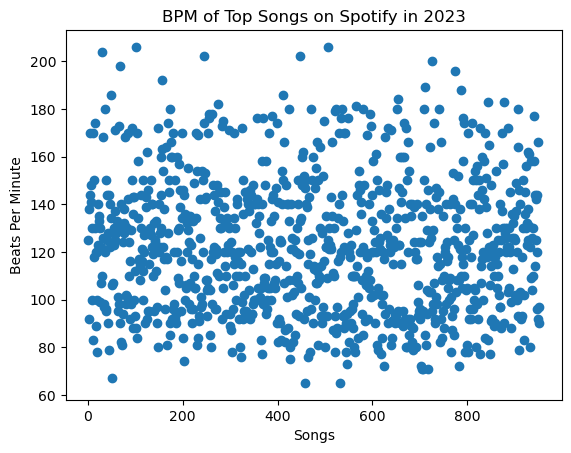

In [52]:
x_values = []
counter = 0

for row in qualities_df["track_name"]:

   counter = counter + 1

   x_values.append(counter)
  
y_values = qualities_df["bpm"]
plt.scatter(x_values, y_values)
plt.xlabel("Songs")
plt.ylabel("Beats Per Minute")
plt.title("BPM of Top Songs on Spotify in 2023")

plt.show()

In [17]:
popular_artists = qualities_df["Artist Name 1"].value_counts()

popular_artists.sort_values(ascending=False)

popular_artists.head(20)

Artist Name 1
Taylor Swift      36
The Weeknd        34
Bad Bunny         26
Kendrick Lamar    23
SZA               23
Drake             19
Harry Styles      17
Feid              15
Ed Sheeran        13
Morgan Wallen     12
Karol G            9
BTS                9
Eminem             9
Labrinth           8
Doja Cat           7
Olivia Rodrigo     7
Nicki Minaj        6
Post Malone        6
Justin Bieber      6
Kanye West         6
Name: count, dtype: int64

In [16]:
streams_df = qualities_df.groupby("Artist Name 1")["streams"].sum()

streams_df.sort_values(ascending=False).head(20)

Artist Name 1
The Weeknd          21516545916
Bad Bunny           15363784442
Ed Sheeran          14559679731
Taylor Swift        14423238266
Harry Styles        11608645649
Eminem              10193727260
Justin Bieber        8138018785
Drake                8043031261
Imagine Dragons      7719446948
Olivia Rodrigo       7442148916
Bruno Mars           7346351599
Dua Lipa             6935012279
SZA                  6493011189
Post Malone          6008998402
Arctic Monkeys       5569806731
Kendrick Lamar       5555903581
Doja Cat             5374950905
Billie Eilish        4972152341
Coldplay             4887142570
The Chainsmokers     4795304992
Name: streams, dtype: int64

In [32]:
top_artists = qualities_df.loc[(qualities_df["Artist Name 1"] == "Bad Bunny") |
                          (qualities_df["Artist Name 1"] == "The Weeknd") |
                          (qualities_df["Artist Name 1"] == "Ed Sheeran") |
                          (qualities_df["Artist Name 1"] == "Taylor Swift") |
                          (qualities_df["Artist Name 1"] == "Harry Styles") |
                          (qualities_df["Artist Name 1"] == "Eminem") |
                          (qualities_df["Artist Name 1"] == "Justin Bieber") |
                          (qualities_df["Artist Name 1"] == "Drake") |
                          (qualities_df["Artist Name 1"] == "Imagine Dragons") |
                          (qualities_df["Artist Name 1"] == "Olivia Rodrigo") |
                          (qualities_df["Artist Name 1"] == "Bruno Mars") |
                          (qualities_df["Artist Name 1"] == "Dua Lipa") |
                          (qualities_df["Artist Name 1"] == "SZA") |
                          (qualities_df["Artist Name 1"] == "Post Malone") |
                          (qualities_df["Artist Name 1"] == "Arctic Monkeys") |
                          (qualities_df["Artist Name 1"] == "Kendrick Lamar") |
                          (qualities_df["Artist Name 1"] == "Doja Cat") |
                          (qualities_df["Artist Name 1"] == "Billie Eilish") |
                          (qualities_df["Artist Name 1"] == "Coldplay") |
                          (qualities_df["Artist Name 1"] == "The Chainsmokers")]
                          
top_artists.sort_values(["Artist Name 1"])
                       

,track_name,Artist Name 1,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
134,505,Arctic Monkeys,1217120710,140,NaN,Major,52,20,85,0,0,7,5
172,Do I Wanna Know?,Arctic Monkeys,1788326445,85,F,Major,55,42,53,17,0,22,3
177,Whyd You Only Call Me When Youre High?,Arctic Monkeys,1267333350,92,D,Major,70,81,63,4,0,8,4
22,I Wanna Be Yours,Arctic Monkeys,1297026226,135,NaN,Minor,48,44,42,12,2,11,3
766,Un Ratito,Bad Bunny,417230415,93,NaN,Minor,79,22,55,31,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Sacrifice,The Weeknd,326792833,122,G,Major,70,91,79,3,0,7,10
371,After Hours,The Weeknd,698086140,109,F,Minor,66,16,57,10,1,12,3
325,The Hills,The Weeknd,1947371785,136,NaN,Minor,36,12,57,9,0,14,8
517,I Heard Youre Married (feat. Lil Wayne),The Weeknd,91656026,110,D,Major,75,85,84,10,0,31,19


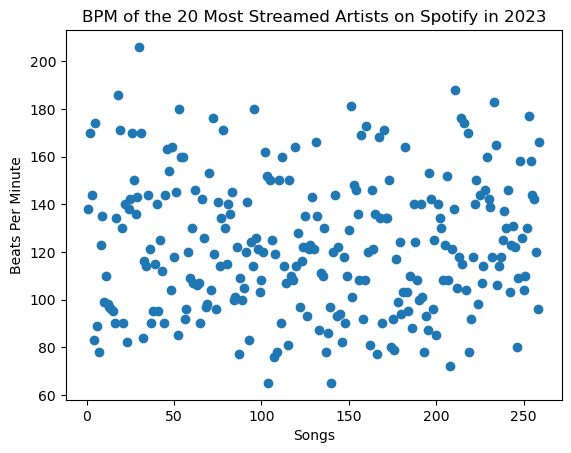

In [53]:
pop_x = []
counter = 0

for row in top_artists["track_name"]:

   counter = counter + 1

   pop_x.append(counter)


pop_y = top_artists["bpm"]
plt.scatter(pop_x, pop_y)
plt.xlabel("Songs")
plt.ylabel("Beats Per Minute")
plt.title("BPM of the 20 Most Streamed Artists on Spotify in 2023")

plt.show()

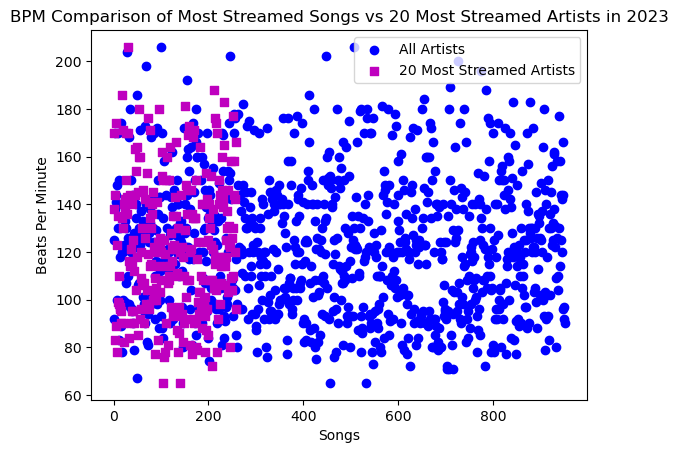

In [63]:
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, c='b', marker='o', label="All Artists")
ax.scatter(pop_x, pop_y, c='m', marker="s", label="20 Most Streamed Artists")
ax.set_xlabel("Songs")
ax.set_ylabel("Beats Per Minute")
ax.set_title("BPM Comparison of Most Streamed Songs vs 20 Most Streamed Artists in 2023")
ax.legend(loc='upper right')


plt.show()

In [67]:
print(f'The average BPM of all top songs from 2023 is {qualities_df["bpm"].mean()}.')
print(f'The average BPM of songs by the 20 most streamed artists in 2023 is {top_artists["bpm"].mean()}.')
print(f'--------------------------')
print(f'The median BPM of all top songs from 2023 is {qualities_df["bpm"].median()}.')
print(f'The median BPM of songs by the 20 most streamed artists in 2023 is {top_artists["bpm"].median()}.')
print(f'--------------------------')
print(f'The mode BPM of all top songs from 2023 is {qualities_df["bpm"].mode()}.')
print(f'The mode BPM of songs by the 20 most streamed artists in 2023 is {top_artists["bpm"].mode()}.')

The average BPM of all top songs from 2023 is 122.55357142857143.
The average BPM of songs by the 20 most streamed artists in 2023 is 122.58301158301158.
--------------------------
The median BPM of all top songs from 2023 is 121.0.
The median BPM of songs by the 20 most streamed artists in 2023 is 120.0.
--------------------------
The mode BPM of all top songs from 2023 is 0    120
Name: bpm, dtype: int64.
The mode BPM of songs by the 20 most streamed artists in 2023 is 0    90
Name: bpm, dtype: int64.


In [71]:
top_artists.loc[top_artists["bpm"] == 90].value_counts()


track_name                                     Artist Name 1  streams     bpm  key  mode   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
F2F                                            SZA            67540165    90   D    Major  53              47         74        9               0                   34          4                1
Karma                                          Taylor Swift   404562836   90   G#   Major  64              10         62        7               0                   48          7                1
Karma (feat. Ice Spice)                        Taylor Swift   46142772    90   G#   Major  62              7          62        6               0                   58          6                1
Stargirl Interlude                             The Weeknd     611700552   90   F    Minor  59              52         48        38              5                   10          11               1
Streets                       

In [72]:
qualities_df.loc[qualities_df["bpm"] == 120].value_counts()

track_name                                                                  Artist Name 1      streams     bpm  key  mode   danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%
10:35                                                                       Tiesto             325592432   120  G#   Major  70              70         79        7               0                   18          10               1
Swim                                                                        Chase Atlantic     498960285   120  G#   Major  67              8          54        27              0                   8           4                1
Night Changes                                                               One Direction      1131090940  120  G#   Major  67              40         52        86              0                   12          4                1
Ojos Marrones                                                               Lasso            

In [7]:
artist_key = qualities_df.groupby(["Artist Name 1", "key"])["key"].value_counts()

key = pd.DataFrame(artist_key.sort_values(ascending=False))

key

,,count
Artist Name 1,key,
The Weeknd,C#,7
Taylor Swift,G,7
Kendrick Lamar,C#,6
The Weeknd,A,5
Taylor Swift,F,4
...,...,...
Imagine Dragons,G,1
Intense,F,1
Israel & Rodolffo,C#,1


In [8]:
artist_mode = qualities_df.groupby(["Artist Name 1", "mode"])["mode"].value_counts()

modes = pd.DataFrame(artist_mode.sort_values(ascending=False))

modes

count
Artist Name 1 mode        
Taylor Swift  Major     32
The Weeknd    Minor     18
              Major     16
SZA           Major     15
Bad Bunny     Major     14
...                    ...
John Legend   Minor      1
              Major      1
Jnr Choi      Major      1
Jin           Major      1
teto          Minor      1

[559 rows x 1 columns]

In [9]:
print(f'The mean danceability % is {round(qualities_df["danceability_%"].mean(), 2)}.')
print(f'The median danceability % is {round(qualities_df["danceability_%"].median(), 2)}.')
print(f'The mode danceability % is {round(qualities_df["danceability_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean valence % is {round(qualities_df["valence_%"].mean(), 2)}.')
print(f'The median valence % is {round(qualities_df["valence_%"].median(), 2)}.')
print(f'The mode valence % is {round(qualities_df["valence_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean energy % is {round(qualities_df["energy_%"].mean(), 2)}.')
print(f'The median energy % is {round(qualities_df["energy_%"].median(), 2)}.')
print(f'The mode energy % is {round(qualities_df["energy_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean acousticness % is {round(qualities_df["acousticness_%"].mean(), 2)}.')
print(f'The median acousticness % is {round(qualities_df["acousticness_%"].median(), 2)}.')
print(f'The mode acousticness % is {round(qualities_df["acousticness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean instrumentalness % is {round(qualities_df["instrumentalness_%"].mean(), 2)}.')
print(f'The median instrumentalness % is {round(qualities_df["instrumentalness_%"].median(), 2)}.')
print(f'The mode instrumentalness % is {round(qualities_df["instrumentalness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean liveness % is {round(qualities_df["liveness_%"].mean(), 2)}.')
print(f'The median liveness % is {round(qualities_df["liveness_%"].median(), 2)}.')
print(f'The mode liveness % is {round(qualities_df["liveness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean speechiness % is {round(qualities_df["speechiness_%"].mean(), 2)}.')
print(f'The median speechiness % is {round(qualities_df["speechiness_%"].median(), 2)}.')
print(f'The mode speechiness % is {round(qualities_df["speechiness_%"].mode(), 2)}.')
print("--------------------------")
print(f'The mean bpm is {round(qualities_df["bpm"].mean(), 2)}.')
print(f'The median bpm is {round(qualities_df["bpm"].median(), 2)}.')
print(f'The mode bpm is {round(qualities_df["bpm"].mode(), 2)}.')

The mean danceability % is 66.98.
The median danceability % is 69.0.
The mode danceability % is 0    70
Name: danceability_%, dtype: int64.
--------------------------
The mean valence % is 51.41.
The median valence % is 51.0.
The mode valence % is 0    24
Name: valence_%, dtype: int64.
--------------------------
The mean energy % is 64.27.
The median energy % is 66.0.
The mode energy % is 0    74
Name: energy_%, dtype: int64.
--------------------------
The mean acousticness % is 27.08.
The median acousticness % is 18.0.
The mode acousticness % is 0    0
Name: acousticness_%, dtype: int64.
--------------------------
The mean instrumentalness % is 1.58.
The median instrumentalness % is 0.0.
The mode instrumentalness % is 0    0
Name: instrumentalness_%, dtype: int64.
--------------------------
The mean liveness % is 18.21.
The median liveness % is 12.0.
The mode liveness % is 0    11
Name: liveness_%, dtype: int64.
--------------------------
The mean speechiness % is 10.14.
The median sp

In [10]:
qualities_df["mode"].value_counts()

mode
Major    549
Minor    403
Name: count, dtype: int64

In [11]:
qualities_df["key"].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64